# Linear Regression Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## Read the data
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
## Analyse the data information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


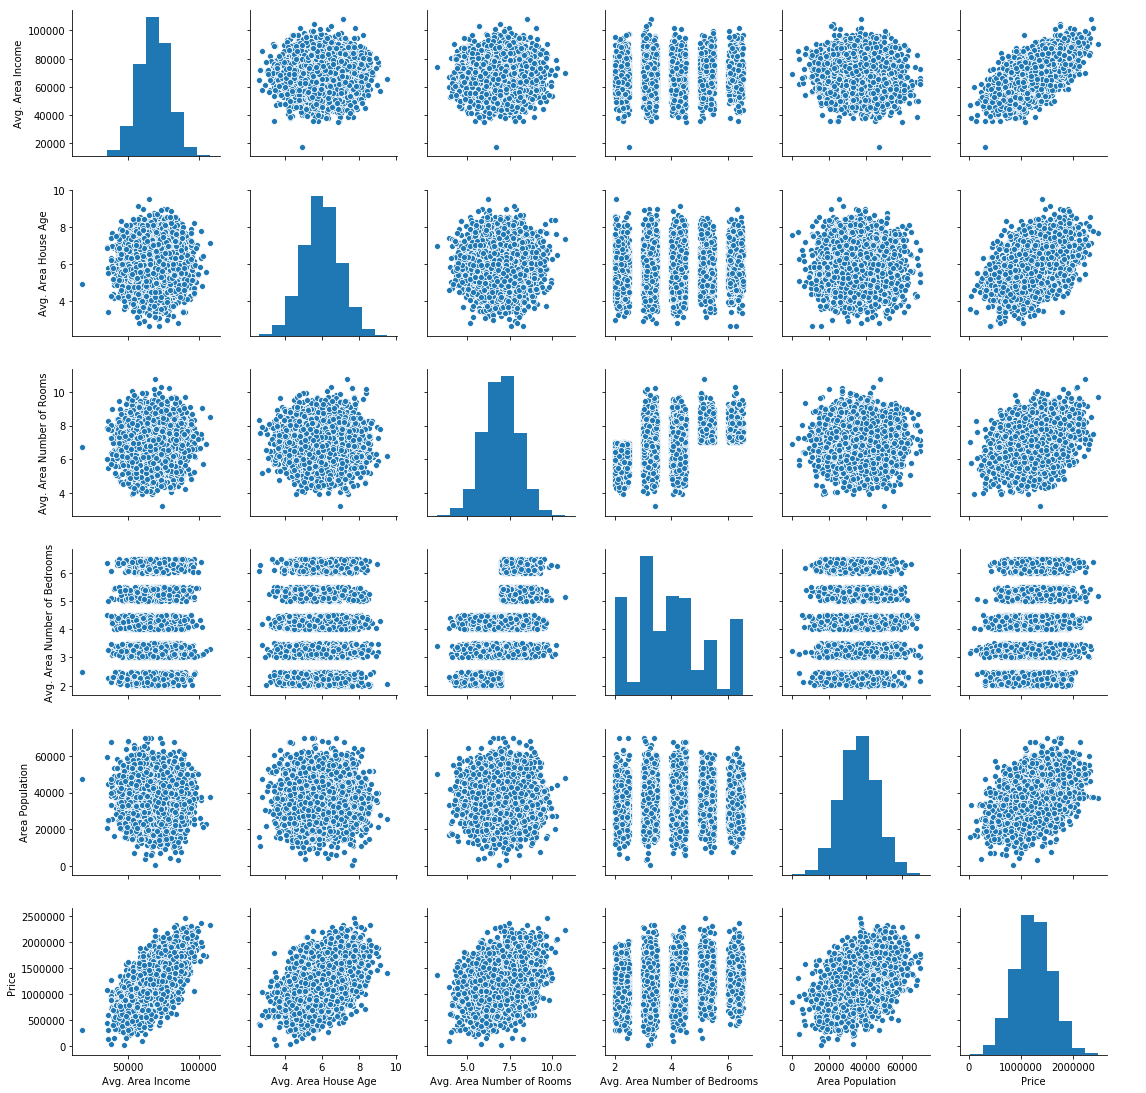

In [5]:
sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


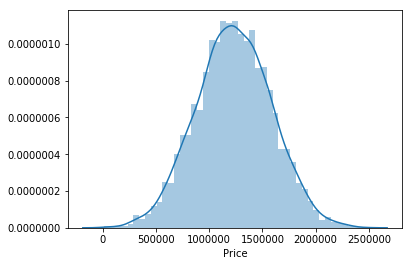

In [6]:
sns.distplot(df['Price'])

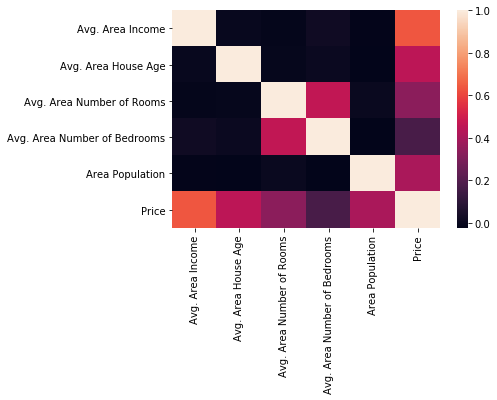

In [7]:
sns.heatmap(df.corr())

# Spliting the data

In [8]:
## from the data pick X axis and Y axis data

X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', ]]
y = df['Price']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

# Creating and training the model

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Model Evaluation

In [13]:
print(lr.coef_)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [14]:
print(lr.intercept_)

-2640159.7968525263


In [15]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

In [16]:
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# Predictions

In [17]:
predictions = lr.predict(X_test)

In [18]:
predictions

array([1260960.70567627,  827588.75560334, 1742421.2425434 , ...,
        372191.40626923, 1365217.15140897, 1914519.5417887 ])

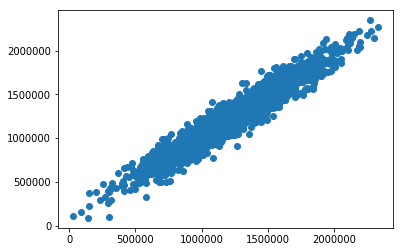

In [19]:
plt.scatter(y_test,predictions)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


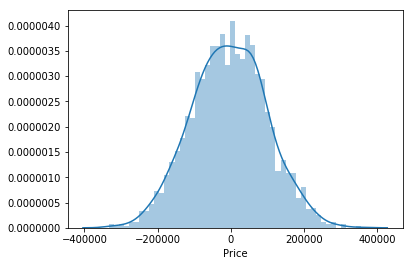

In [21]:
sns.distplot((y_test-predictions),bins=50)

# Regression Evaluation Metrices

In [26]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,predictions))
print("MSE: ",metrics.mean_squared_error(y_test, predictions))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  82288.22251914948
MSE:  10460958907.209064
RMSE:  102278.8292229094


# Boston Data

In [27]:
from sklearn.datasets import load_boston 

In [62]:
boston = load_boston()

In [63]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [64]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [65]:
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [66]:
boston_df['Price'] = boston.target

In [67]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [69]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

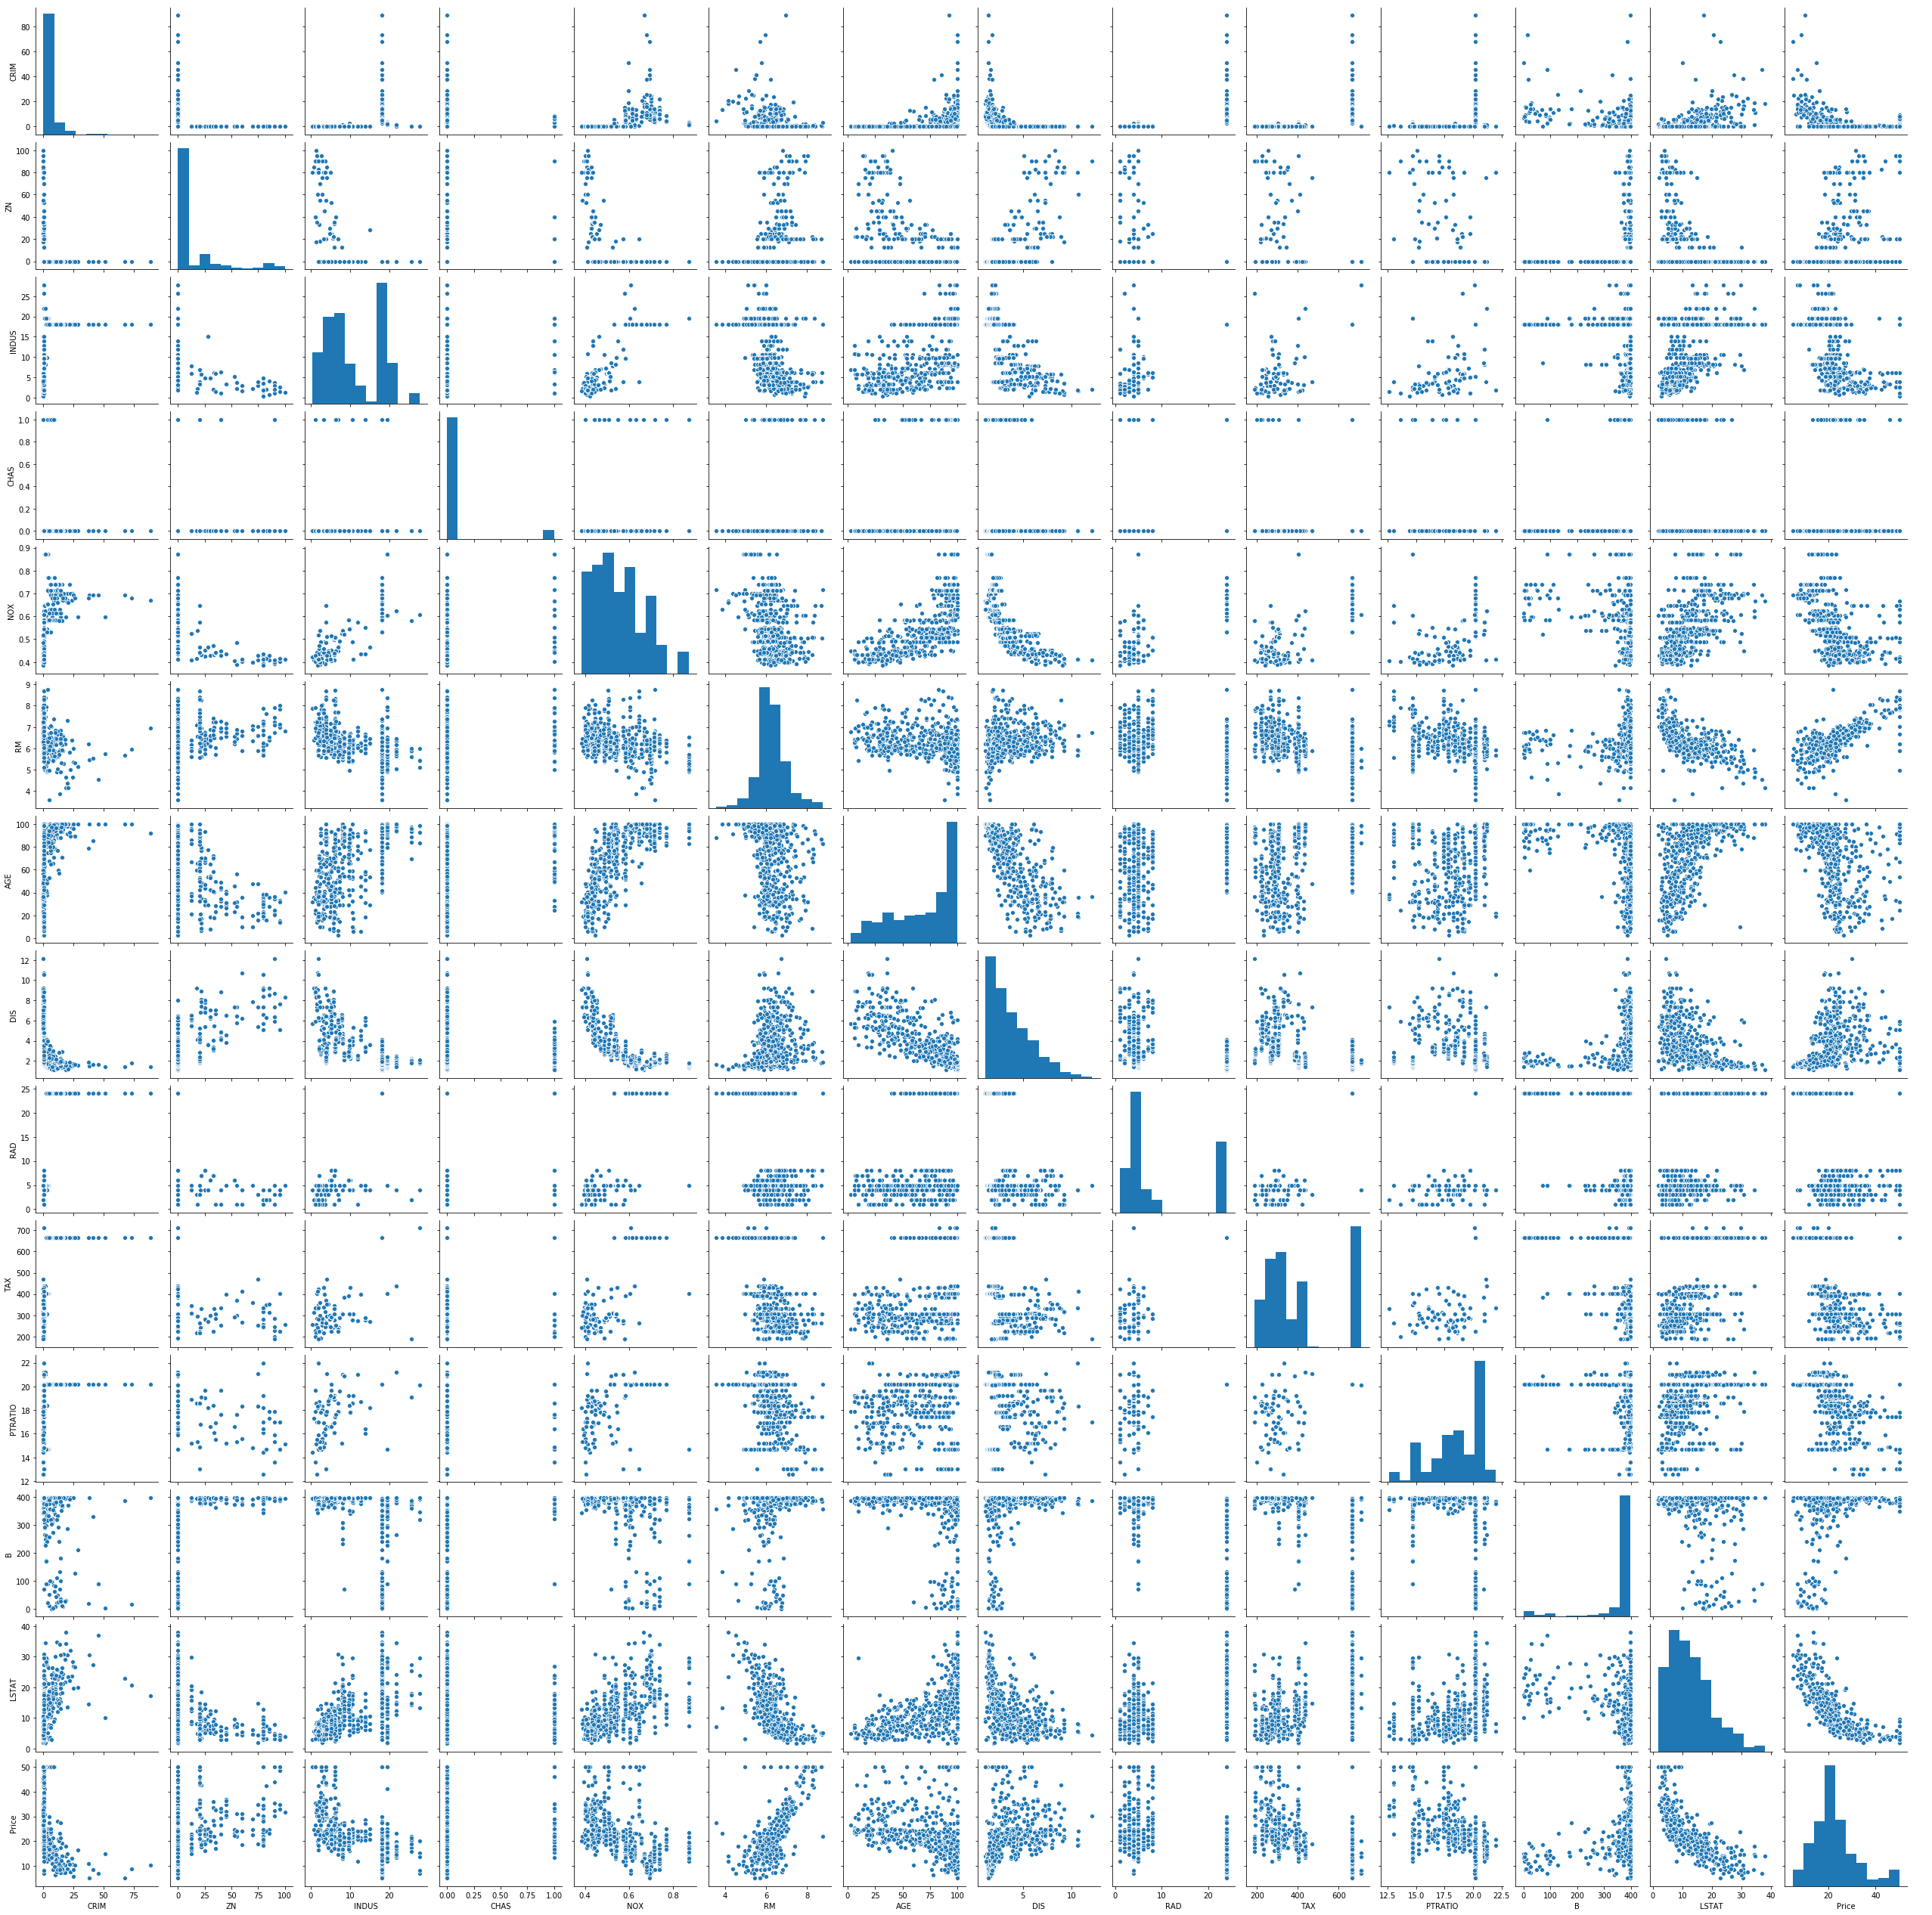

In [70]:
sns.pairplot(boston_df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


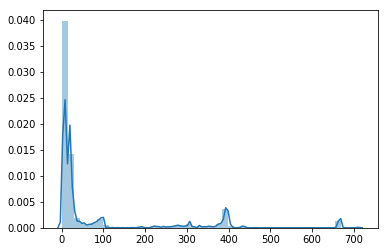

In [71]:
sns.distplot((boston_df), bins= 50)

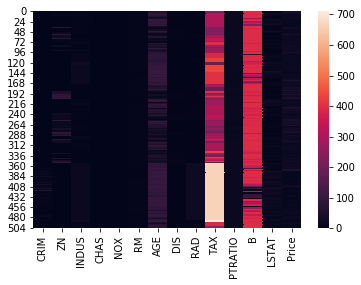

In [73]:
sns.heatmap(boston_df)

# 1.Spliting   2.Training   3. Evaluating model

In [ ]:
## Data splitting
X = boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y= boston_df['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [80]:
## Trainning Data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
## Evaluate
print(lm.coef_)
print(lm.intercept_)
coef_df = pd.DataFrame(lm.coef_,X_train.columns, columns=["Coeffs"])
coef_df

[-7.69175693e-02  3.95527497e-02 -6.09889801e-03  2.63034959e+00
 -1.31416178e+01  3.84418005e+00 -1.20624925e-02 -1.37626293e+00
  2.83925319e-01 -1.40640197e-02 -9.18566330e-01  1.05783116e-02
 -4.37960459e-01]
33.115840942986


,Coeffs
CRIM,-0.076918
ZN,0.039553
INDUS,-0.006099
CHAS,2.630350
NOX,-13.141618
RM,3.844180
AGE,-0.012062
DIS,-1.376263
RAD,0.283925
TAX,-0.014064


# Predictions

In [86]:
predict = lm.predict(X_test)
predict

array([34.01651319, 31.05189517, 22.33884524, 18.0838353 , 20.56688064,
       25.98808555, 26.01540609, 23.82611577, 22.21599346, 19.28360875,
       26.66123555, 16.98260577, 20.99150244, 15.24603617, 41.09899335,
       20.25245593, 28.49362648, 19.02746332, 32.1219971 , 40.55013347,
       34.85510783, 16.62558247, 20.26594393, 17.78965573, 13.61712506,
       12.31506816, 27.30863471, 20.08837791, 18.3960775 , 20.36652738,
       15.63267698, 24.40174268, 38.95380335, 24.82674   , 31.67752332,
       28.52641185, 14.69895345, 14.24630553, 16.49088419, 23.30593651,
       23.14883147, 23.67414203, 13.62859392, 21.35912779, 31.4375316 ,
       26.93449598, 19.05250575, 16.18779463, 16.95967267, 12.540738  ,
       21.69054323, 20.12269149, 23.8317502 , 24.2081579 , 11.78551306,
       14.84388066, 25.02378959, 33.63041801, 10.04068529, 21.02680054,
       17.26643982, 19.29350402, 18.0135788 , 30.0595925 , 21.27173516,
       25.42909898, 15.88028621, 25.28296871, 22.47917188, 20.74

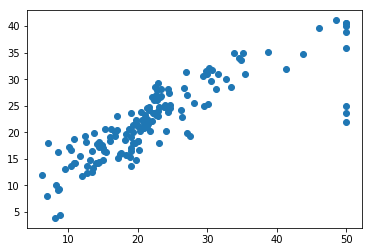

In [88]:
plt.scatter(y_test,predict)

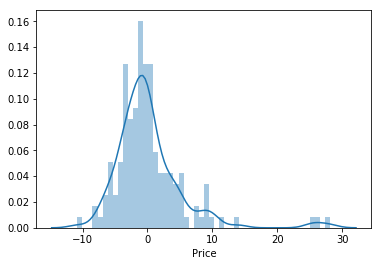

In [90]:
sns.distplot((y_test-predict), bins = 50)

# Evaluation Matrices

In [91]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,predict))
print("MSE: ",metrics.mean_squared_error(y_test, predict))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predict)))

MAE:  3.4719478482701565
MSE:  29.79884430147879
RMSE:  5.458831770761835
